# Elliptic Example: 2D Laplacian

We want to model the electric potential for an empty 2D box, 10cm x 10cm in size, where the top wall is held at $V$ = 1.0V and the other walls at 0V.

$$0 = \nabla^2 \phi  = \frac{\partial^2 \phi}{\partial x^2} + \frac{\partial^2 \phi}{\partial y^2},$$
$$ \phi(y = 10) = 1.0 V$$
$$ \phi(y = 0) = \phi(x = 0) = \phi(x = 10) = 0$$

![](fig9-2.png)

## Exercise 1

Setup up the problem: 
* discretize space in x and y, using an MxM grid
* implement the boundary conditions

Then use Jacobi Relaxation to solve it, with target accuracy 1e-04 and M=10. Print the number of iterations required to reach the target accuracy.

You can consult the textbook's `laplace.py` for help.

In [ ]:
import numpy as np


def LaplacianSolver(M, V, target):

    # Create arrays to hold potential values
    phi = np.zeros([M + 1, M + 1], float)
    phi[0, :] = V  # Top constant V Value
    phiprime = np.empty([M + 1, M + 1], float)

    # Main loop
    delta = 1.0

    iterations = 0
    while delta > target:

        # Calculate new values of the potential
        for i in range(M + 1):
            for j in range(M + 1):
                if i == 0 or i == M or j == 0 or j == M:
                    phiprime[i, j] = phi[i, j]
                else:
                    # main equation
                    phiprime[i, j] = (
                        phi[i + 1, j] + phi[i - 1, j] + phi[i, j + 1] + phi[i, j - 1]
                    ) / 4

        # Calculate maximum difference from old values
        delta = np.max(
            abs(phi - phiprime)
        )  # because we are checking if both values are equal (relaxation)

        # Swap the two arrays around
        phi, phiprime = phiprime, phi
        iterations += 1

    print(f"Took {iterations} iterations")
    return phi


# Constants
M = 10  # Grid squares on a side
V = 1.0  # Voltage at top wall
target = 1e-4  # Target accuracy

# Calculate the potential
phi = LaplacianSolver(M, V, target)

Took 106 iterations


## Exercise 2

Plot the solution (you can use matplotlib.pyplot.imshow)

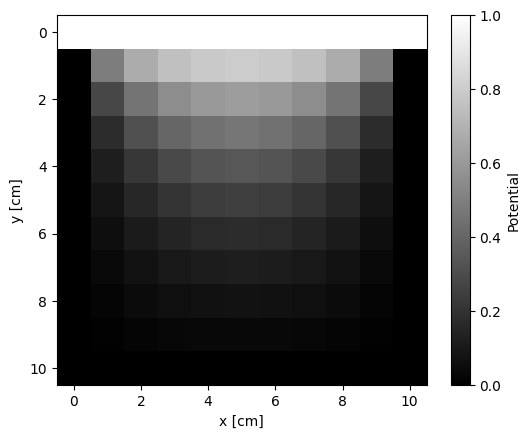

In [59]:
import matplotlib.pyplot as plt

plt.imshow(phi, cmap="gray")
plt.xlabel("x [cm]")
plt.ylabel("y [cm]")
plt.colorbar(label="Potential")

## Exercise 3

Now repeat Exercises 1 and 2 with M=100. Do you notice a difference in runtime?

Took 1909 iterations


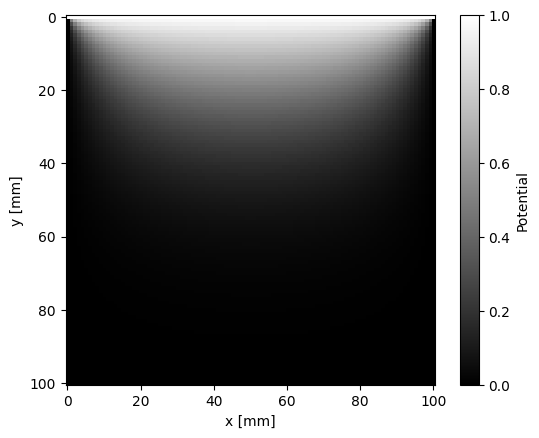

In [60]:
phi = LaplacianSolver(100, V, target)
plt.imshow(phi, cmap="gray")
plt.xlabel("x [mm]")
plt.ylabel("y [mm]")
plt.colorbar(label="Potential")

**Runtime was approx 32 seconds compared to near instantaneous!**

# Hyperbolic Example: Wave Equation

Recall the 1D wave equation:
$$ \frac{\partial^2\phi}{\partial t^2}=v^2\frac{\partial^2\phi}{\partial x^2} $$
Consider a piano string of length $L$, initially at rest. At time $t=0$ the string is struck by the piano hammer a distance $d$ from the end of from the string. The string vibrates as a result of being struck, except at the ends, $x=0$, and $x=L$, where it is held fixed.

Consider the case $v=100\mathrm{ms^{-1}}$, with the initial condition that $\phi(x)=0$ everywhere but the velocity $\psi(x)$ is nonzero, with profile
\begin{equation}
  \psi(x) = C\frac{x(L-x)}{L^2}\exp\left[-\frac{(x-d)^2}{2\sigma^2}\right],
\end{equation}
where $L=1$ m, $d=10$ cm, $C=1\mathrm{ms^{-1}}$, and $\sigma=0.3$ m. 

## Exercise 4

Solve using the FTCS method, with grid spacing (in $x$) $a=5$ mm, from times 0 to 0.1s using time--step $h=10^{-6}$ s.
Make a plot of $\phi$ vs $x$ over the entire length of string, at each of the following times:
* 0.006 s
* 0.004 s
* 0.002 s
* 0.012 s
* 0.100 s

You'll see your first 4 plots look good, then the instability of the solution shows up!

200 200 200


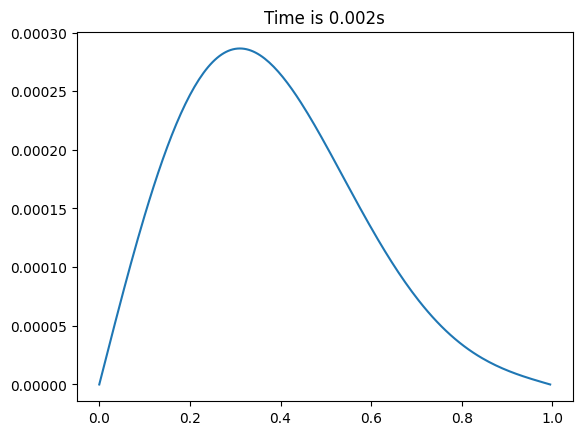

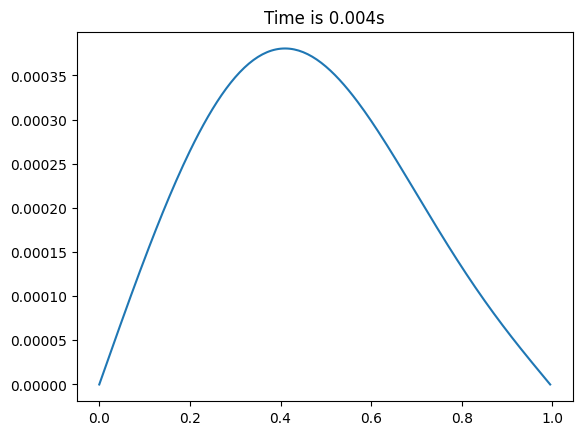

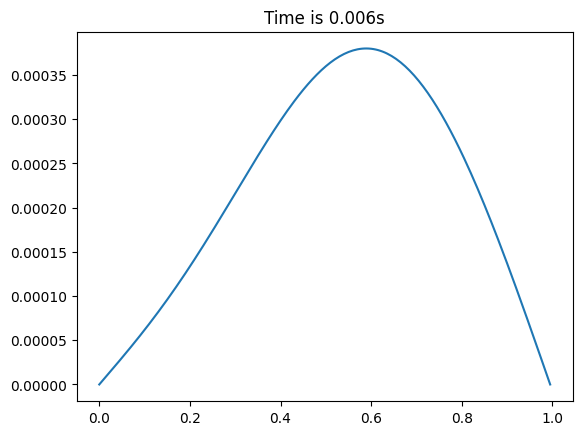

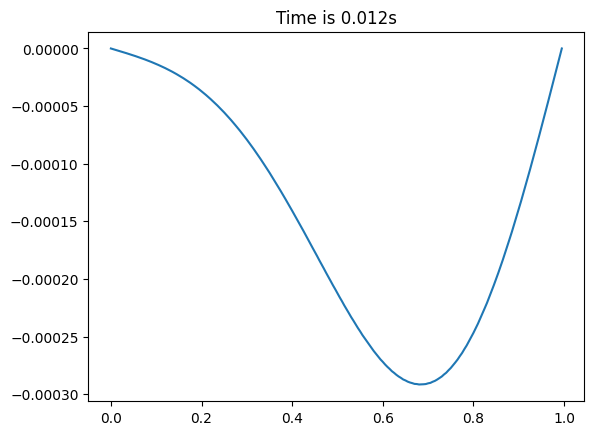

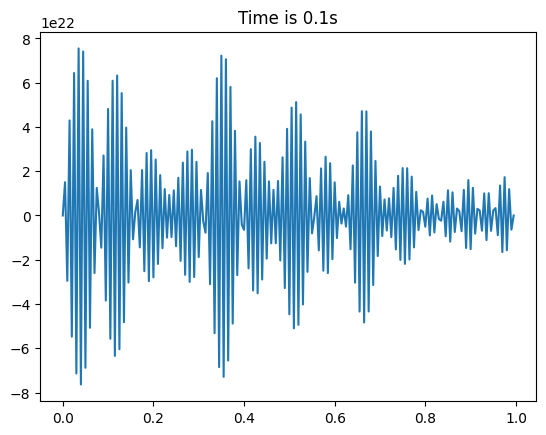

In [61]:
# From heat.py in the textbook resources


def psiFunc(x, C, L, d, sigma):
    temp = np.exp(-((x - d) ** 2) / (2 * sigma**2))
    return C * x * (L - x) * temp / L**2


# Constants
L = 1  # Length of piano string in meters
v = 100  # Wave speed m/s
C = 1  # m/s
sigma = 0.3  # m
d = 0.1  # m

a = 5e-3  # 5mm grid spacing, in m
x = np.arange(0, L, a)  # x array with 100 points
N = len(x) - 1  # number of grid points

h = 1e-6  # Time-step
epsilon = h / 100  # threshold for plotting

t1 = 0.002
t2 = 0.004
t3 = 0.006
t4 = 0.012
t5 = 0.100
tend = t5 + epsilon

# Create arrays
phi = np.zeros_like(x)
phip = np.copy(phi)

psi = psiFunc(x, C, L, d, sigma)
psip = np.empty(N, float)
psip[0], psip[-1] = psi[0], psi[-1]

print(len(x), len(phi), len(psi))

# Main loop
t = 0.0
c = h * (v * v) / (a * a)
while t < tend:

    # THIS IS SO MUCH SLOWER
    # for i in range(1, N):
    #     phip[i] = phi[i] + h * psi[i]
    #     psip[i] = psi[i] + c * (phi[i + 1] + phi[i - 1] - 2 * phi[i])

    phip[1:N] = phi[1:N] + h * psi[1:N]
    psip[1:N] = psi[1:N] + c * (phi[0 : N - 1] + phi[2 : N + 1] - 2 * phi[1:N])

    psip, psi = psi, psip
    phip, phi = phi, phip

    t += h

    # Make plots at the given times
    if abs(t - t1) < epsilon:
        plt.figure()
        plt.plot(x, phi)
        plt.title(f"Time is {t1}s")
        plt.show()
    if abs(t - t2) < epsilon:
        plt.figure()
        plt.plot(x, phi)
        plt.title(f"Time is {t2}s")
        plt.show()
    if abs(t - t3) < epsilon:
        plt.figure()
        plt.plot(x, phi)
        plt.title(f"Time is {t3}s")
        plt.show()
    if abs(t - t4) < epsilon:
        plt.figure()
        plt.plot(x, phi)
        plt.title(f"Time is {t4}s")
        plt.show()
    if abs(t - t5) < epsilon:
        plt.figure()
        plt.plot(x, phi)
        plt.title(f"Time is {t5}s")
        plt.show()

## Exercise 5

Repeat the previous exercise using the Crank--Nicolson method. Use a larger time--step, $h = 10^{-4}$ s.

You'll see the solution is stable. It dies out to 0 at about 0.1 s, but this is how the physical system is supposed to behave!

the CN method involves a set of simultaneous equations, one for each grid point. We can solve using the methods for linear systems in Chapter 6 -- in particular, banded matrix. The following snippets of code will help you define the matrix, and the vector to use on the right-hand side, of the CK equations.

In [62]:
def matrix(N, alpha):
    """Banded matrix for the Crank-Nicolson
    Args:
        N : number of elements
        alpha = 2*h*v**2/a**2 , h: timestep length, a: spatial grid spacing, v: wave speed
    """
    bands = np.zeros((3, N + 2))
    bands[0, :-2] = -alpha
    bands[2, 1:-1] = -alpha
    bands[1, :] = 1 + 2 * alpha
    return bands


def banded(Aa, va, up=1, down=1):
    # from textbook online resources, to solve Ax = v
    # Aa is banded matrix A, va is vector v, up and down give band positions in matrix

    # Copy the inputs and determine the size of the system
    A = np.copy(Aa)
    v = np.copy(va)
    N = len(v)

    # Gaussian elimination
    for m in range(N):

        # Normalization factor
        div = A[up, m]

        # Update the vector first
        v[m] /= div
        for k in range(1, down + 1):
            if m + k < N:
                v[m + k] -= A[up + k, m] * v[m]

        # Now normalize the pivot row of A and subtract from lower ones
        for i in range(up):
            j = m + up - i
            if j < N:
                A[i, j] /= div
                for k in range(1, down + 1):
                    A[i + k, j] -= A[up + k, m] * A[i, j]

    # Backsubstitution
    for m in range(N - 2, -1, -1):
        for i in range(up):
            j = m + up - i
            if j < N:
                v[m] -= A[i, j] * v[j]

    return v

In [75]:
def rhs(phi, psi, alpha, h):
    """Solve the Right hand side of the Crank-Nicolson algorithm.
    Args:
        phi, psi : position and velocity
        alpha = 2*h*v**2/a**2,
        h=dt, timestep

    Returns:
    the column vector for the right hand side.
    """
    r = np.zeros_like(phi)
    r[1:-1] = (
        h * psi[1:-1] + alpha * phi[:-2] + (1 - 2 * alpha) * phi[1:-1] + alpha * phi[2:]
    )
    return r

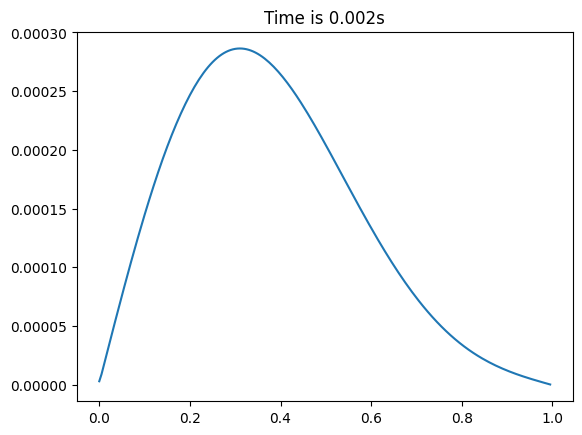

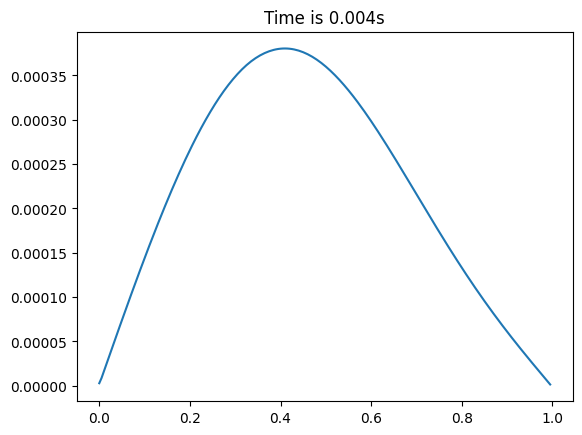

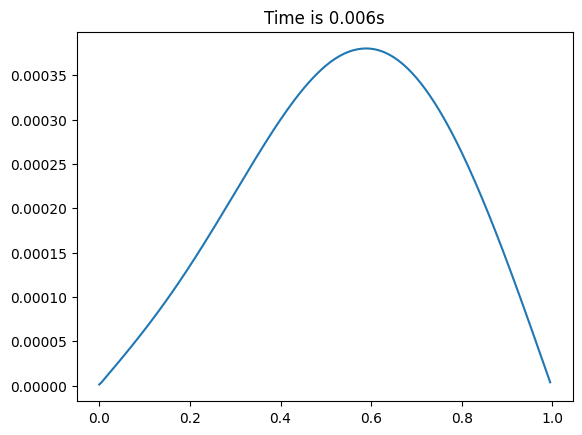

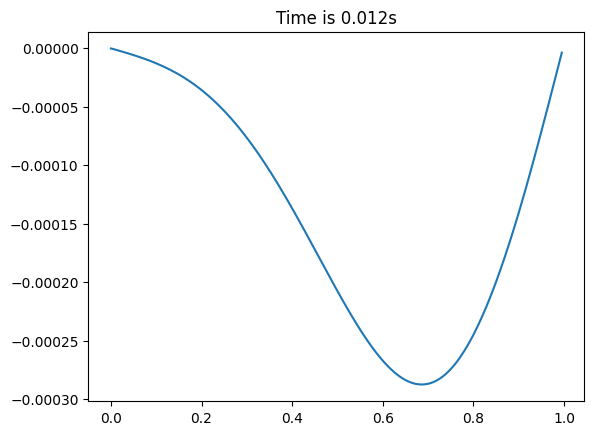

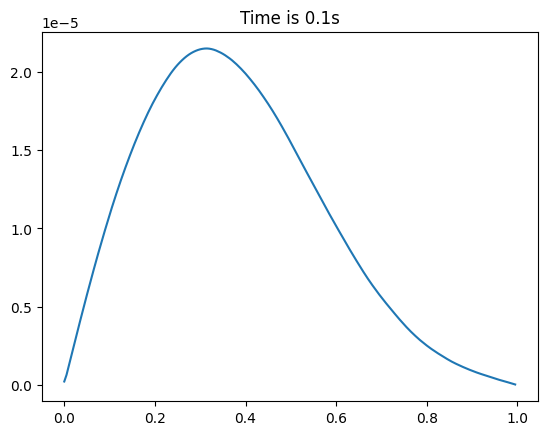

In [ ]:
# Constants
L = 1  # Length of piano string in meters
v = 100  # Wave speed m/s
C = 1  # m/s
sigma = 0.3  # m
d = 0.1  # m

a = 5e-3  # 5mm grid spacing, in m
x = np.arange(0, L, a)  # x array with 100 points
N = len(x) - 1  # number of grid points

h = 1e-4  # Time-step
alpha = h**2 * v**2 / (4 * a**2)  # h/2**2 * c?
epsilon = h / 100  # threshold for plotting

t1 = 0.002
t2 = 0.004
t3 = 0.006
t4 = 0.012
t5 = 0.100
tend = t5 + epsilon

# Create arrays
phi = np.zeros_like(x)
phip = np.copy(phi)

psi = psiFunc(x, C, L, d, sigma)
psip = np.empty(N, float)
psip[0], psip[-1] = psi[0], psi[-1]


# Define the banded matrix
A_mat = matrix(len(phi), alpha)

t = 0
# Integrate using CN
while t < tend:

    r = rhs(phi, psi, alpha, h)
    phiN = banded(A_mat, r)

    psiN = 2 / h * (phiN - phi) - psi  # straight from equation
    psi, phi = psiN.copy(), phiN.copy()

    t += h

    # Make plots at the given times
    if abs(t - t1) < epsilon:
        plt.figure()
        plt.plot(x, phi)
        plt.title(f"Time is {t1}s")
        plt.show()
    if abs(t - t2) < epsilon:
        plt.figure()
        plt.plot(x, phi)
        plt.title(f"Time is {t2}s")
        plt.show()
    if abs(t - t3) < epsilon:
        plt.figure()
        plt.plot(x, phi)
        plt.title(f"Time is {t3}s")
        plt.show()
    if abs(t - t4) < epsilon:
        plt.figure()
        plt.plot(x, phi)
        plt.title(f"Time is {t4}s")
        plt.show()
    if abs(t - t5) < epsilon:
        plt.figure()
        plt.plot(x, phi)
        plt.title(f"Time is {t5}s")
        plt.show()